# Homework #2



## Question #1

There are four text files in the data folder

* Atatürk's "Nutuk" in Turkish
* Dicken's novel "Great Expectations" in English
* Flauberts' novel "Madam Bovary" in French
* A text file `unknown.txt` in an unknown language

Your tasks are

* Calculate how many times each character (letter) appear in each text.
* Calculate the character distributions, i.e. using the character counts, calculate the probability of each character appearing in the text.
* Find the set of characters common to all three texts.
* Using the common set and the KL-divergence, show that each language have different character distributions.
* Determine the language of the text file `unknown.txt` KL-divergence measure.

In [1]:
nutuk = open(r"C:\Users\Hakan\Desktop\HW2\data\ataturk_nutuk.txt", "r" , encoding="utf8")
nutuk_data = nutuk.read()
number_of_characters_nutuk = len(nutuk_data)
dickens = open(r"C:\Users\Hakan\Desktop\HW2\data\dickens_great_expectations.txt", "r" , encoding="utf8")
dickens_data = dickens.read()
number_of_characters_dickens = len(dickens_data)
madam = open(r"C:\Users\Hakan\Desktop\HW2\data\flaubert_madame_bovary.txt", "r" , encoding="utf8")
madam_data = madam.read()
number_of_characters_madam = len(madam_data)
unknown = open(r"C:\Users\Hakan\Desktop\HW2\data\unknown.txt", "r" , encoding="utf8")
unknown_data = unknown.read()
number_of_characters_unknown = len(unknown_data)
print('Number of characters in Nutuk file :', number_of_characters_nutuk)
print('Number of characters in Dickens file :', number_of_characters_dickens)
print('Number of characters in Madams file :', number_of_characters_madam)
print('Number of characters in Unknown file :', number_of_characters_unknown)

Number of characters in Nutuk file : 1435648
Number of characters in Dickens file : 1014396
Number of characters in Madams file : 704245
Number of characters in Unknown file : 1473


In [3]:
nutuk_characters = ''.join(filter(str.isalpha, nutuk_data))
dickens_characters = ''.join(filter(str.isalpha, dickens_data))
madam_characters = ''.join(filter(str.isalpha, madam_data))
unknown_characters = ''.join(filter(str.isalpha, unknown_data))
from collections import Counter  
counter_nutuk = Counter(nutuk_characters.lower())
counter_dickens = Counter(dickens_characters.lower())
counter_madam = Counter(madam_characters.lower())
counter_unknown = Counter(unknown_characters.lower())

In [4]:
counter_nutuk

Counter({'m': 70970,
         'n': 78316,
         'u': 39595,
         't': 42763,
         'k': 48302,
         'i': 100973,
         '̇': 6358,
         'ç': 8621,
         'd': 45880,
         'e': 113769,
         'l': 75077,
         'r': 74210,
         'ö': 7364,
         's': 30823,
         'z': 15602,
         'b': 29401,
         'c': 10939,
         'ü': 19764,
         'y': 29511,
         'a': 119069,
         'v': 15632,
         'ş': 19547,
         'ı': 44242,
         'o': 20304,
         'g': 14561,
         'h': 12848,
         'p': 7380,
         'ğ': 10532,
         'f': 7498,
         'â': 2643,
         'î': 1469,
         'j': 163,
         'á': 2,
         'ì': 5,
         'û': 836,
         'ó': 1,
         'w': 66,
         'í': 4,
         'ú': 1,
         'q': 1,
         'é': 30,
         'x': 3,
         'ß': 1})

In [5]:
counter_dickens

Counter({'t': 70355,
         'h': 48738,
         'e': 93720,
         'p': 13417,
         'r': 42122,
         'o': 61277,
         'j': 1759,
         'c': 17625,
         'g': 16871,
         'u': 22257,
         'n': 53781,
         'b': 12451,
         'k': 7680,
         'f': 16130,
         'a': 64021,
         'x': 1126,
         'i': 55801,
         's': 45936,
         'y': 16410,
         'l': 28564,
         'd': 37182,
         'w': 20526,
         'm': 22906,
         'v': 6896,
         'q': 710,
         'z': 166,
         'ô': 1,
         'ê': 1})

In [6]:
counter_madam

Counter({'t': 40678,
         'h': 6177,
         'e': 79764,
         'p': 14651,
         'r': 35857,
         'o': 29092,
         'j': 2052,
         'c': 16344,
         'g': 5190,
         'u': 33588,
         'n': 36296,
         'b': 6245,
         'k': 154,
         'f': 5880,
         'm': 15786,
         'a': 46611,
         'd': 20056,
         'v': 8791,
         'y': 2029,
         's': 44074,
         'l': 35195,
         'i': 40356,
         'w': 280,
         'è': 1651,
         'x': 2116,
         'à': 2810,
         'é': 8295,
         'z': 678,
         'ê': 1196,
         'q': 5709,
         'ç': 477,
         'î': 328,
         'ù': 293,
         'â': 410,
         'û': 241,
         'ï': 37,
         'ô': 296,
         'ë': 9,
         'ü': 5})

In [7]:
counter_unknown

Counter({'f': 27,
         'o': 92,
         'u': 21,
         'r': 79,
         's': 43,
         'c': 31,
         'e': 165,
         'a': 102,
         'n': 77,
         'd': 58,
         'v': 24,
         'y': 10,
         'g': 28,
         't': 126,
         'h': 80,
         'b': 14,
         'i': 68,
         'w': 28,
         'l': 42,
         'p': 15,
         'm': 13,
         'q': 1,
         'k': 3})

In [8]:
prob_nutuk = {key:float(value)/sum(counter_nutuk.values()) for (key,value) in counter_nutuk.items()}
prob_dickens = {key:float(value)/sum(counter_dickens.values()) for (key,value) in counter_dickens.items()}
prob_madam = {key:float(value)/sum(counter_madam.values()) for (key,value) in counter_madam.items()}
prob_unknown = {key:float(value)/sum(counter_unknown.values()) for (key,value) in counter_unknown.items()}
print(prob_nutuk)
print(prob_dickens)
print(prob_madam)
print(prob_unknown)

{'m': 0.06308018302763546, 'n': 0.0696095197124461, 'u': 0.035193178060859885, 't': 0.038008987837266105, 'k': 0.04293221080175917, 'i': 0.0897477148210432, '̇': 0.005651173787370809, 'ç': 0.0076625934603529, 'd': 0.04077946734265063, 'e': 0.10112116870326983, 'l': 0.06673060308814693, 'r': 0.06595998848077819, 'ö': 0.006545335603994752, 's': 0.02739637144512904, 'z': 0.01386750761726319, 'b': 0.026132456829583067, 'c': 0.009722898719730933, 'ü': 0.0175668132641706, 'y': 0.026230228002374952, 'a': 0.10583196157415144, 'v': 0.013894172482570067, 'ş': 0.017373937405117522, 'ı': 0.039323565696895144, 'o': 0.018046780839694385, 'g': 0.012942236791114555, 'h': 0.011419672982091877, 'p': 0.006559556865491753, 'ğ': 0.009361145380400969, 'f': 0.006664438669032136, 'â': 0.0023491746335358677, 'î': 0.0013056895711934127, 'j': 0.00014487910150069863, 'á': 1.7776576871251365e-06, 'ì': 4.444144217812841e-06, 'û': 0.000743060913218307, 'ó': 8.888288435625682e-07, 'w': 5.86627036751295e-05, 'í': 3.55

In [9]:
nutuk_set = set(counter_nutuk)
dickens_set = set(counter_dickens)
madam_set = set(counter_madam)
unknown_set = set(counter_unknown)
common_characters = nutuk_set.intersection(dickens_set , madam_set)
common_characters

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [10]:
import scipy as sp
final_dict_nutuk = {x:prob_nutuk[x] for x in common_characters 
                              if x in common_characters}

final_dict_dickens = {x:prob_dickens[x] for x in common_characters 
                              if x in common_characters}
final_dict_madam = {x:prob_madam[x] for x in common_characters 
                              if x in common_characters}

In [11]:
import numpy as np


def kl_divergence(p, q):
    return sum(p[i] * np.log2(p[i]/q[i]) for i in range(len(p)))

vals_nutuk = np.fromiter(final_dict_nutuk.values(), dtype=float)
vals_dickens = np.fromiter(final_dict_dickens.values(), dtype=float)
vals_madam = np.fromiter(final_dict_madam.values(), dtype=float)

kl_divergence(vals_nutuk, vals_dickens)

0.21349206734269086

In [12]:
kl_divergence(vals_dickens,vals_madam )

0.3832010001404491

In [13]:
kl_divergence(vals_madam, vals_nutuk)

0.5822165900021921

## Question #2

For this question consider the [Car Evaluation Data Set](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) from UCI. Here is the [direct link](https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data) to the dataset.

Make [contingency tables](https://en.wikipedia.org/wiki/Contingency_table#:~:text=In%20statistics%2C%20a%20contingency%20table,%2C%20engineering%2C%20and%20scientific%20research.) of the columns (using [`crosstab`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) function from [pandas](https://pandas.pydata.org)) and figure out which pairs of columns are dependent and independent. Explain your result using statistical tests.

In [74]:
import pandas as pd

names = ['buying' , 'maint' , 'doors' , 'person' , 'lug_boot' , 'safety','class']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data" , names = names)

buyingmaint = pd.crosstab(df['buying'] , df['maint'])
buyingmaint

maint,high,low,med,vhigh
buying,,,,
high,108,108,108,108
low,108,108,108,108
med,108,108,108,108
vhigh,108,108,108,108


In [30]:
maintdoors = pd.crosstab(df['maint'] , df['doors'])
maintdoors

doors,2,3,4,5more
maint,,,,
high,108,108,108,108
low,108,108,108,108
med,108,108,108,108
vhigh,108,108,108,108


In [31]:
doorsperson = pd.crosstab(df['doors'] , df['person'])
doorsperson

person,2,4,more
doors,,,
2,144,144,144
3,144,144,144
4,144,144,144
5more,144,144,144


In [32]:
personlug_boot = pd.crosstab(df['person'] , df['lug_boot'])
personlug_boot

lug_boot,big,med,small
person,,,
2,192,192,192
4,192,192,192
more,192,192,192


In [36]:
lug_bootsafety = pd.crosstab(df['lug_boot'] , df['safety'])
lug_bootsafety

Observed_Values = lug_bootsafety.values
import scipy.stats
d=scipy.stats.chi2_contingency(lug_bootsafety)
Expected_Values = d[3]
Expected_Values

array([[192., 192., 192.],
       [192., 192., 192.],
       [192., 192., 192.]])

In [41]:
#Degree of freedom

no_of_rows= 3
no_of_columns=3
degreeoff=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",degreeoff)
alpha=0.05
from scipy.stats import chi2

Degree of Freedom:- 4


In [44]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=degreeoff)
print('p-value:',p_value)

p-value: 1.0


In [ ]:
#All cells of every contingecy table are equal and p-value = 1.0.

## Question #3

For this question, use [Default of Credit Card Clients Data Set]() from UCI. Here is the [direct link](https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls) to the dataset.

Your tasks are

* Inspect the dataset.
* Would it be appropriate to form a linear regression model to predict the `default payment next month` variable? Explain.
* Form a [contingency table](https://en.wikipedia.org/wiki/Contingency_table#:~:text=In%20statistics%2C%20a%20contingency%20table,%2C%20engineering%2C%20and%20scientific%20research.) of the columns `SEX` vs `default payment next month` and `EDUCATION` vs `default payment next month`.
* Are there statistically verifiable relationships between credit card defaults, the gender of and the education level the borrower? Which is stronger? Quantify your analysis using [Chi Square Test](https://en.wikipedia.org/wiki/Chi-squared_test).

In [78]:
import pandas as pd
import scipy as sp
#We dont have real values between (-∞ , +∞) for default payment next month. It is only 1 and 0, so it will be proper to use logistic regression.
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls" , header=1)
sextable = pd.crosstab(df['SEX'] , df['default payment next month'])
sextable

default payment next month,0,1
SEX,,
1,9015,2873
2,14349,3763


In [80]:
Observed_Values = sextable.values
Observed_Values

array([[ 9015,  2873],
       [14349,  3763]], dtype=int64)

In [84]:
import scipy.stats
b=scipy.stats.chi2_contingency(sextable)
Expected_Values = b[3]
Expected_Values

array([[ 9258.3744,  2629.6256],
       [14105.6256,  4006.3744]])

In [111]:
#Degree of freedom

no_of_rows=len(sextable.iloc[0:2,0])
no_of_columns=len(sextable.iloc[0,0:2])
degreeoff=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",degreeoff)

Degree of Freedom:- 1


In [88]:
#Significance Level 5%
alpha=0.05

In [89]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 47.90543311657917


In [91]:
critical_value=chi2.ppf(q=1-alpha,df=degreeoff)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [93]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=degreeoff)
print('p-value:',p_value)

p-value: 4.472755499307368e-12


In [101]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',degreeoff)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',4.47275549930736*2.718281828459045-12)


Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 47.90543311657917
critical_value: 3.841458820694124
p-value: 0.15820999690746085


In [ ]:
#chi-square statistic > critical_value so there is a relationship between them.
# Null Hypothesis -Default payment next month is independent of gender
#Reject Null Hypothesis

In [102]:
edtable = pd.crosstab(df['EDUCATION'] , df['default payment next month'])
edtable

default payment next month,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


In [103]:
Observed_Values = edtable.values
Observed_Values

array([[   14,     0],
       [ 8549,  2036],
       [10700,  3330],
       [ 3680,  1237],
       [  116,     7],
       [  262,    18],
       [   43,     8]], dtype=int64)

In [105]:
c=scipy.stats.chi2_contingency(edtable)
Expected_Values = c[3]
Expected_Values

array([[1.0903200e+01, 3.0968000e+00],
       [8.2435980e+03, 2.3414020e+03],
       [1.0926564e+04, 3.1034360e+03],
       [3.8293596e+03, 1.0876404e+03],
       [9.5792400e+01, 2.7207600e+01],
       [2.1806400e+02, 6.1936000e+01],
       [3.9718800e+01, 1.1281200e+01]])

In [117]:
#Degree of freedom

no_of_rows=len(edtable.iloc[0:7,0])
no_of_columns=len(edtable.iloc[0,0:2])
degreeoff=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",degreeoff)

Degree of Freedom:- 6


In [120]:
#Significance Level 5%
alpha=0.05

In [121]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 163.2165578699707


In [122]:
critical_value=chi2.ppf(q=1-alpha,df=degreeoff)
print('critical_value:',critical_value)

critical_value: 12.591587243743977


In [123]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=degreeoff)
print('p-value:',p_value)

p-value: 0.0


In [125]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',degreeoff)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  6
chi-square statistic: 163.2165578699707
critical_value: 12.591587243743977
p-value: 0.0


In [ ]:
#chi-square statistic > critical_value so there is a relationship between them.Also education is stronger.

## Question #4

For this question, use the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) from UCI.  Here is the [direct link](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) to the dataset.

Your tasks are

* Form a [K-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) model for this dataset.
* Test your model on random samples of your data and calculate its accuracy.
* Repeat your calculation 100 times and give an interval of accuracy values leaving the best 2.5% and worst 2.5% accuracy values.
* Is there a better way of doing this without repeating the calculation 100 times? Explain.
* Find the best parameter $k$ for your dataset for the K-NN model.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import random

In [53]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length' , 'sepal-width' , 'petal-length' , 'petal-width' , 'class']

df=pd.read_csv(url , names = names)

In [54]:
df.head(200)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [66]:
X = df.iloc[:,:-1].values
y = df.iloc[:,4].values

for x in range(100):
    test_size = round(random.uniform(0.1,0.90),1)
    X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = test_size)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Test set Accuracy:  0.9333333333333333
Test set Accuracy:  0.9222222222222223
Test set Accuracy:  0.9666666666666667
Test set Accuracy:  0.9333333333333333
Test set Accuracy:  0.9333333333333333
Test set Accuracy:  0.8952380952380953
Test set Accuracy:  0.9466666666666667
Test set Accuracy:  0.9733333333333334
Test set Accuracy:  0.95
Test set Accuracy:  0.95
Test set Accuracy:  0.9555555555555556
Test set Accuracy:  0.9333333333333333
Test set Accuracy:  0.9833333333333333
Test set Accuracy:  0.9733333333333334
Test set Accuracy:  0.9333333333333333
Test set Accuracy:  0.9083333333333333
Test set Accuracy:  1.0
Test set Accuracy:  0.92
Test set Accuracy:  0.9222222222222223
Test set Accuracy:  0.9333333333333333
Test set Accuracy:  0.9666666666666667
Test set Accuracy:  0.9333333333333333
Test set Accuracy:  0.9083333333333333
Test set Accuracy:  1.0
Test set Accuracy:  0.9333333333333333
Test set Accuracy:  0.9333333333333333
Test set Accuracy:  0.9777777777777777
Test set Accuracy: 

In [67]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)
mean_acc

array([0.9       , 0.9       , 0.9       , 0.9       , 0.9       ,
       0.93333333, 0.96666667, 0.96666667, 0.96666667])

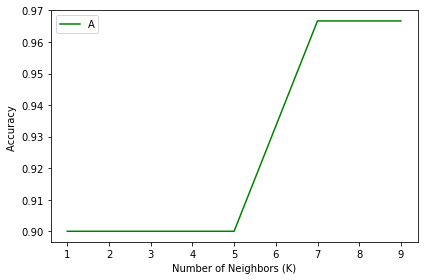

In [76]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [72]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9666666666666667 with k= 7


## Question #5

For this question, we are going to use [Concrete Slump Test Dataset](https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test) from UCI. Here is the [direct link](https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data) to the dataset.

Your tasks are

* Form three separate linear regression model for the following dependent variables:

  - SLUMP (cm)
  - FLOW (cm)
  - 28-day Compressive Strength (Mpa)
  
* Compare how well these models fit.

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data")
df.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


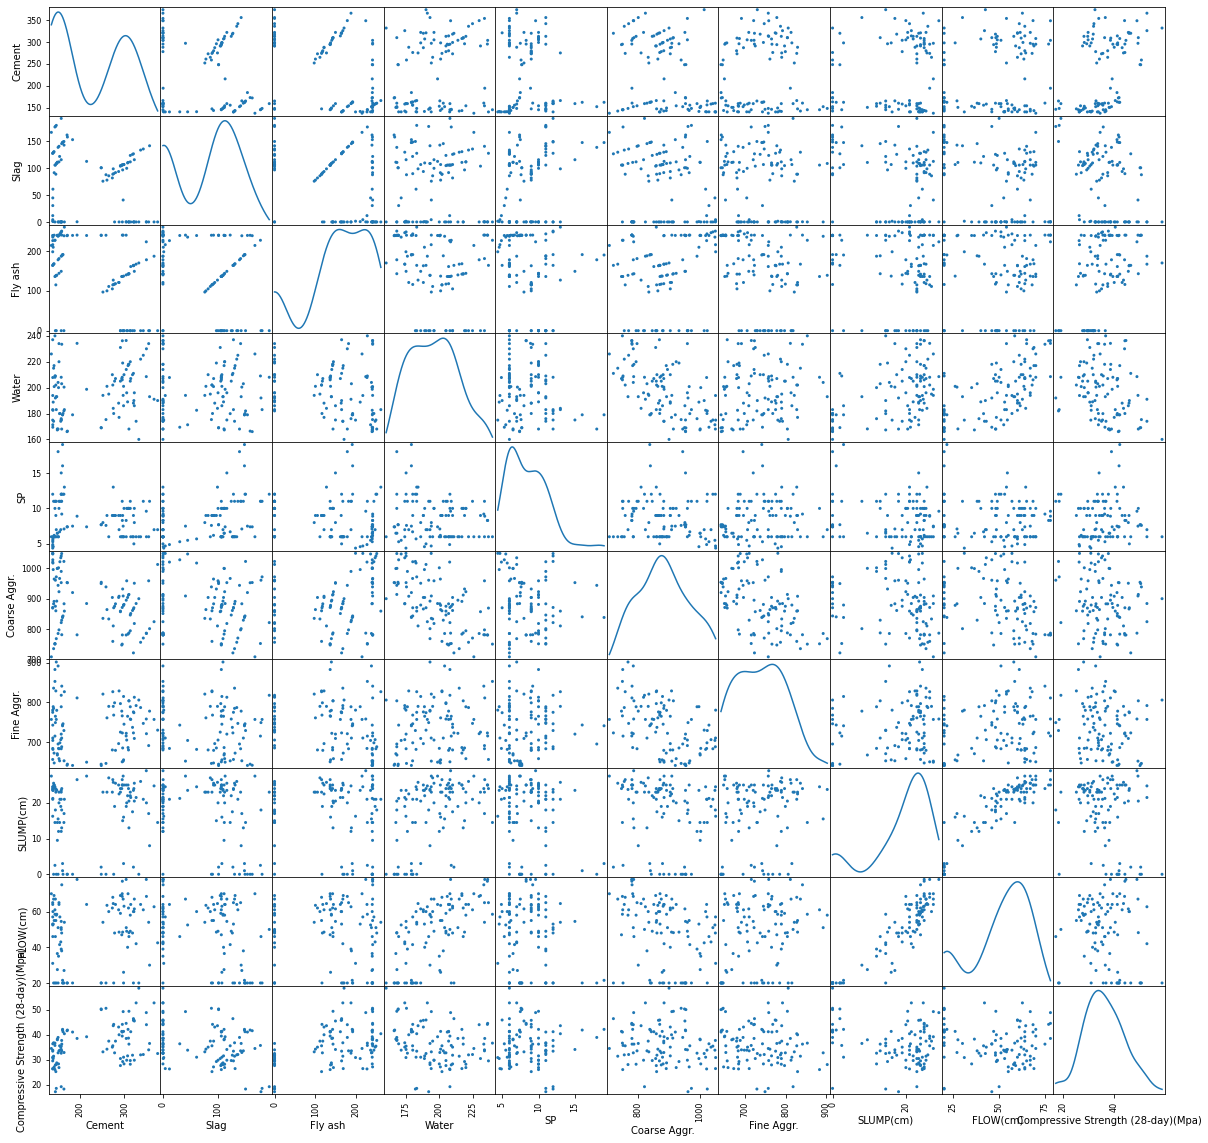

In [5]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(df.iloc[:,1:11], alpha=1, figsize=(20, 20), diagonal='kde')

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [7]:
from sklearn import linear_model
regr_slump = linear_model.LinearRegression()
regr_flow = linear_model.LinearRegression()
regr_comp = linear_model.LinearRegression()
x_train = np.asanyarray(train[['Cement','Slag','Fly ash' , 'Water' , 'SP' , 'Coarse Aggr.' , 'Fine Aggr.']])
y_SLUMP_train = np.asanyarray(train[['SLUMP(cm)']])
y_FLOW_train = np.asanyarray(train[['FLOW(cm)']])
y_COMP_train = np.asanyarray(train[['Compressive Strength (28-day)(Mpa)']])
regr_slump.fit (x_train, y_SLUMP_train)
regr_flow.fit (x_train, y_FLOW_train)
regr_comp.fit (x_train, y_COMP_train)
print ('Coefficients of slump: ', regr_slump.coef_)
print ('Coefficients of flow: ', regr_flow.coef_)
print ('Coefficients of comp: ', regr_comp.coef_)

Coefficients of slump:  [[ 0.02335566 -0.0045369   0.01656651  0.23163703 -0.25284068  0.03164262
   0.04219674]]
Coefficients of flow:  [[0.09008131 0.03935025 0.09744067 0.78941338 0.29979617 0.10544292
  0.12800255]]
Coefficients of comp:  [[ 0.06609587 -0.01891932  0.05730658 -0.19072898  0.1074249  -0.04434951
  -0.03103064]]


In [8]:
y_predict_slump = regr_slump.predict(test[['Cement','Slag','Fly ash' , 'Water' , 'SP' , 'Coarse Aggr.' , 'Fine Aggr.']])
x_test = np.asanyarray(test[['Cement','Slag','Fly ash' , 'Water' , 'SP' , 'Coarse Aggr.' , 'Fine Aggr.']])
y_SLUMP_test = np.asanyarray(test[['SLUMP(cm)']])
y_FLOW_test = np.asanyarray(test[['FLOW(cm)']])
y_COMP_test = np.asanyarray(test[['Compressive Strength (28-day)(Mpa)']])
print("Residual sum of squares: %.2f"
      % np.mean((y_predict_slump - y_SLUMP_test) ** 2))

print('Variance score: %.2f' % regr_slump.score(x_test, y_SLUMP_test))

Residual sum of squares: 59.44
Variance score: 0.36


In [9]:
y_predict_flow = regr_flow.predict(test[['Cement','Slag','Fly ash' , 'Water' , 'SP' , 'Coarse Aggr.' , 'Fine Aggr.']])

print("Residual sum of squares: %.2f"
      % np.mean((y_predict_flow - y_FLOW_test) ** 2))

print('Variance score: %.2f' % regr_flow.score(x_test, y_FLOW_test))

Residual sum of squares: 122.46
Variance score: 0.54


In [11]:
y_predict_comp = regr_comp.predict(test[['Cement','Slag','Fly ash' , 'Water' , 'SP' , 'Coarse Aggr.' , 'Fine Aggr.']])

print("Residual sum of squares: %.2f"
      % np.mean((y_predict_comp - y_COMP_test) ** 2))

print('Variance score: %.2f' % regr_comp.score(x_test, y_COMP_test))

Residual sum of squares: 9.38
Variance score: 0.88


In [ ]:
#Best fitting model is for Compressive Strength because its residual sum is lowest and variance score is closest to 1